In [13]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.matrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [14]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [15]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
x = df.YearsExperience
y = df["Salary"]

In [18]:
x = np.array(x)
x=x.reshape(-1,1)

y = np.array(y)
y=y.reshape(-1,1)

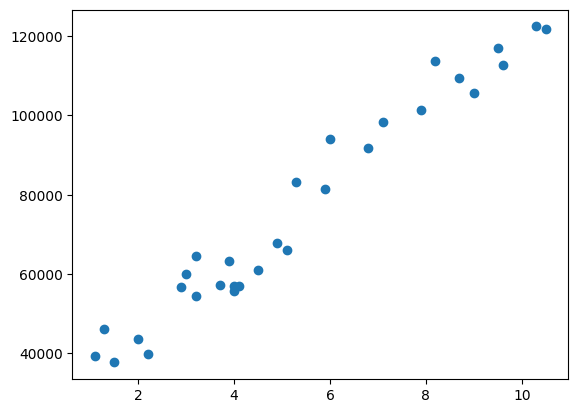

In [19]:
plt.scatter(x,y)

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test)

In [24]:
lr.predict([[2.1]])

array([[45738.50891885]])

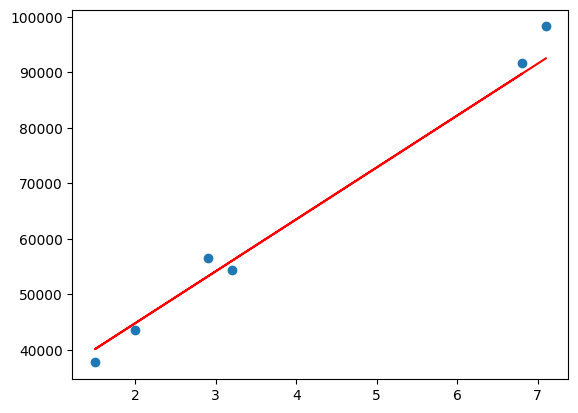

In [25]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red")

In [26]:
print("Accuracy of the model:",lr.score(x_test,y_test)*100)

Accuracy of the model: 98.16423482070253


In [27]:
lr.score(x_train,y_train)

0.9494673013344644

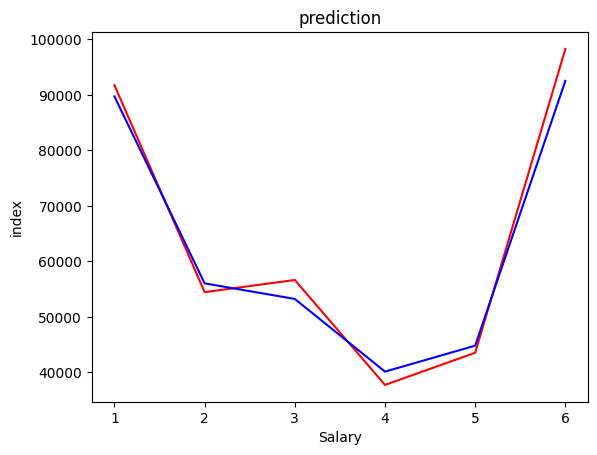

In [28]:
c = [i for i in range(1,len(y_test)+1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('prediction')
plt.show()

In [ ]:
print("mean squared erorr: ",mean_squared_error(y_test,y_pred))
print("r square: ",r2_score(y_test,y_pred))

In [29]:
Y_intercept=lr.intercept_
Slope=lr.coef_
print("Intercept of the model:",Y_intercept,"\nSlope of the line",Slope)

Intercept of the model: [26089.09663242] 
Slope of the line [[9356.86299354]]


In [30]:
years = pd.DataFrame([1,1.2,2.2,5.4,11.9,20], columns=['year'])
years

,year
0,1.0
1,1.2
2,2.2
3,5.4
4,11.9
5,20.0


In [31]:
salary_pred = lr.predict(years)
salary_pred

array([[ 35445.95962596],
       [ 37317.33222466],
       [ 46674.1952182 ],
       [ 76616.15679753],
       [137435.76625554],
       [213226.3565032 ]])

In [32]:
years['salary_pred'] = salary_pred
years

,year,salary_pred
0,1.0,35445.959626
1,1.2,37317.332225
2,2.2,46674.195218
3,5.4,76616.156798
4,11.9,137435.766256
5,20.0,213226.356503


In [33]:
years.to_csv("years.csv")